# Google Colab 데이터 로드

In [1]:
#Step 1. 구글 코랩에 한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
study = pd.read_csv(io.BytesIO(myfile['공부시간과시험점수.csv']),
                       encoding='cp949')
study

ModuleNotFoundError: No module named 'google.colab'

# 로컬 데이터 로드

In [3]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
study = pd.read_csv('./머신러닝실습용자료/공부시간과시험점수.csv',encoding='cp949')
study

,이름,공부시간,시험점수
0,이원재,15.0,85.0
1,맹승주,14.5,86.5
2,안미경,14.0,86.0
3,서진수,13.5,85.5
4,황경인,13.0,85.0
5,신운무,12.0,83.0
6,권율,12.0,85.0
7,강준,11.0,82.0
8,신사임당,11.0,83.0
9,문무왕,10.5,82.0


# 공통 실습 코드

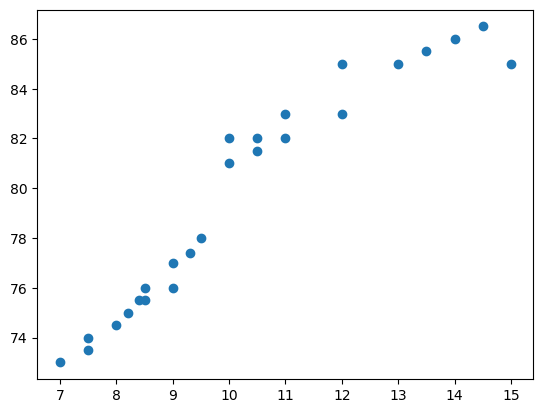

In [5]:
# data, target 정의
data = study['공부시간']
target = study['시험점수']

# 산점도 그리기
import matplotlib.pyplot as plt
plt.plot(data,target,'o')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

# train, test 데이터 나누기 위해 numpy로 변경
data = study['공부시간'].to_numpy()
target = study['시험점수'].to_numpy()

# 훈련 세트와 테스트 세트로 나눕니다.
X = data
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print('학습 데이터 :' ,X_train.shape)
print('테스트 데이터 : ', X_test.shape)

학습 데이터 : (20,)
테스트 데이터 :  (5,)


In [ ]:
# shape 확인
None

In [16]:
# data 전체 확
X_train

array([13.5,  8. , 14. , 10. ,  8.5, 13. , 11. ,  9. ,  7.5,  8.2, 15. ,
       10.5, 10.5,  7.5, 10. , 14.5,  8.5, 12. , 11. , 12. ])

In [20]:
# reshape 함수에 -1을 넣으면, rows은 자동으로 입력해달라는 뜻
# 즉, column을 1개로 내가 정했으니, 남은 데이터는 알아서 row에 잘 넣어주세요.
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [21]:
# shape 확인
X_train.shape

(20, 1)

결정 계수: 0.8367662584885617
평균 제곱근 오차: 0.7238197405121753


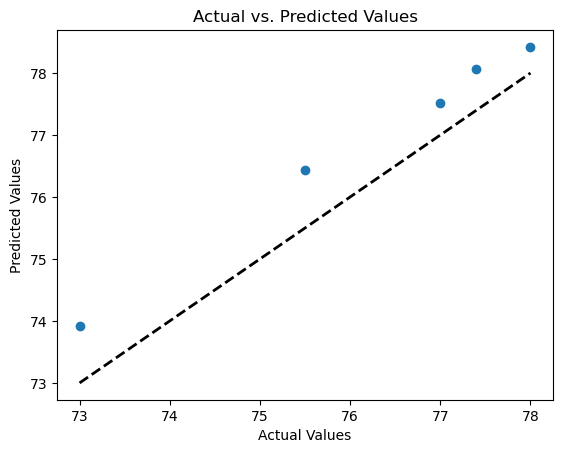

In [22]:
# data 전체 확인
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)
# 예측
y_pred = model.predict(X_test)
# 결정 계수 계산
r2 = r2_score(y_test, y_pred)

# 평균 제곱근 오차 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("결정 계수:", r2)
print("평균 제곱근 오차:", rmse)
y_pred = model.predict(X_test)

# 그래프로 시각화
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # 일치하는 직선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


In [ ]:
# 선형회귀모델 학습\
None

In [23]:
# 점수 확인(lr.score는 결정계수R2에 대한 정확도를 의미합니다.)
print(model.score(X_train , y_train))
print(model.score(X_test , y_test))

0.886911457690887
0.8367662584885617


In [25]:
# 16이라는 값을 넣었을 때 예상 결과값 확인
model.predict([[0]])

array([61.31748461])

In [26]:
# 회귀계수 확인
print(model.coef_ , model.intercept_)

[1.80042161] 61.31748460585439


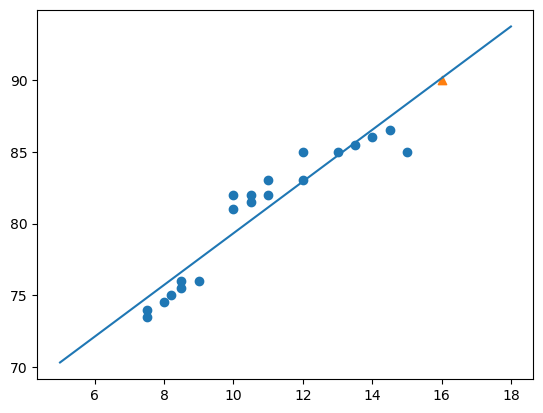

In [28]:
import matplotlib.pyplot as plt
plt.scatter(X_train , y_train)
plt.plot( [5,18], [5*model.coef_ +model.intercept_ ,
                    18*model.coef_ + model.intercept_])
plt.scatter(16 , 90 ,marker="^")
plt.show()

## 다항회귀분석 적용

In [29]:
# 다항회귀분석 적용
import numpy as np
훈련용_data = X_train
훈련용_target= y_train
테스트용_data=X_test
테스트용_target=y_test

훈련용_data_poly = np.column_stack(( 훈련용_data ** 2, 훈련용_data))
테스트용_data_poly = np.column_stack((테스트용_data ** 2 , 테스트용_data))

lr = LinearRegression()
lr.fit(훈련용_data_poly , 훈련용_target)
lr.score(테스트용_data_poly , 테스트용_target)

0.5052713132458166

In [30]:
lr.predict([[16**2,16]])

array([85.24161226])

In [31]:
print(lr.score(훈련용_data_poly , 훈련용_target))
print(lr.score(테스트용_data_poly , 테스트용_target))

0.9686934811074566
0.5052713132458166
